In [139]:
!ls

Research.ipynb
marketing_campaign.csv


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp
import statsmodels as sm
%matplotlib inline

In [141]:
customer_df = pd.read_csv('marketing_campaign.csv', index_col='ID', sep='\t', parse_dates=['Dt_Customer']) 

In [143]:
customer_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [5]:
def extract_age(current_year, birth_year)->pd.Series:
    """
    Function gets current year and column of customers' birth year 
    Returns pd.Series with customers' age
    """
    
    age = pd.Series(current_year - birth_year)
    return age

In [6]:
customer_df['Age'] = extract_age(2020, customer_df['Year_Birth'])

In [7]:
customer_df['Age'].describe()

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: Age, dtype: float64

As we can see, some customers in our dataset are quite old :)

In [8]:
customer_df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

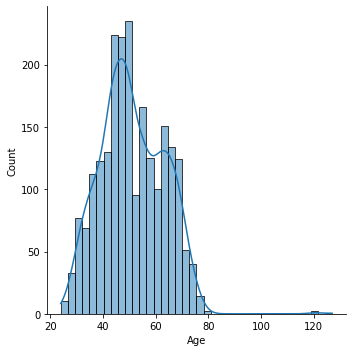

In [9]:
sns.displot(customer_df['Age'], kde=True)

Normally distributed values but there are too high

In [10]:
customer_df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
customer_df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

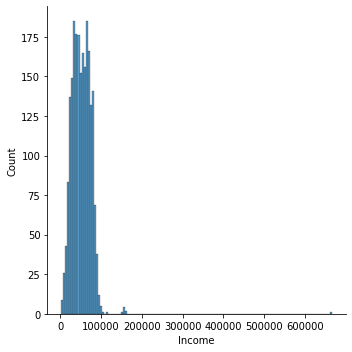

In [12]:
sns.displot(customer_df['Income'])

Present income values over 600 000

<h3>Get rid of too high age data (>100) and data without income (there is only 24 of them so we may neglect this data)</h3>

In [13]:
customer_df = customer_df[(customer_df['Age'] < 100) & (~customer_df['Income'].isna())]

<h2>Mean Income by Age</h2>

<AxesSubplot:xlabel='Age', ylabel='Income'>

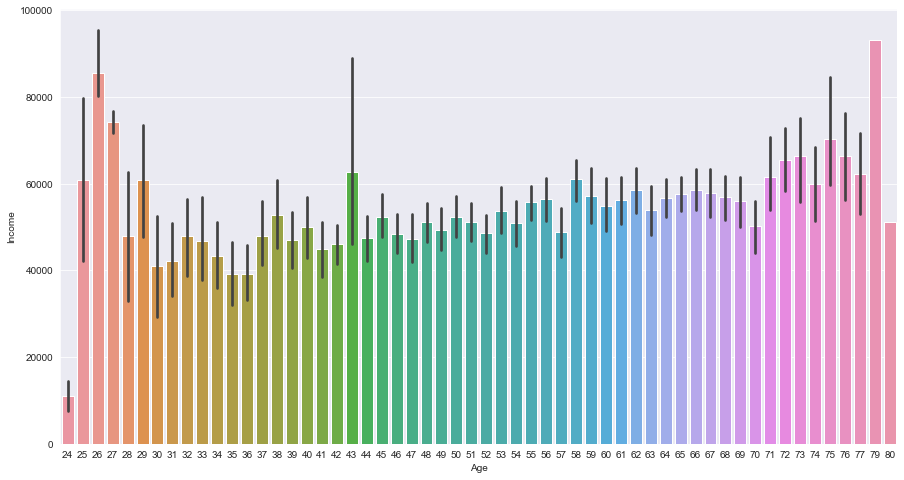

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.barplot(x='Age', y='Income', data=customer_df)

<h1 style='color:green;font-size:30px;padding:30px'>Data engeneering</h1>

New features:
<ul>
    <p>     Money spent on food</p>
    <li>MntFood = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts</li>
    <p>     Number accepted offers</p>
    <li>AcceptedNum = sum(AcceptedCmp1..5)</li>
    <p>     Number of purchases</p>
    <li>AcceptedNum = sum(..Purchases)</li>
    <p>     Number of years as customer</p>
    <li>AcceptedNum = current_year - Dt_Customer.year</li>
</ul>

In [15]:
def sum_values(df, cols_names)->pd.Series:
    """
    Function gets pd.DataFrame of data and list of columns names to add
    Returns pd.Series with the sum of given columns 
    """
    
    res = df[cols_names[0]]
    for i in range(1, len(cols_names)):
        res += df[cols_names[i]]
        
    return res

In [16]:
customer_df['MntFood'] = sum_values(customer_df, ['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts'])
customer_df['MntFood'].describe()

count    2213.000000
mean      563.110258
std       576.907087
min         4.000000
25%        55.000000
50%       343.000000
75%       964.000000
max      2491.000000
Name: MntFood, dtype: float64

In [17]:
customer_df['AcceptedNum'] = sum_values(customer_df, ['AcceptedCmp' + str(i) for i in range(1,6)])
customer_df['AcceptedNum'].describe()

count    2213.000000
mean        0.298238
std         0.679446
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: AcceptedNum, dtype: float64

In [18]:
customer_df['TotalPurchases'] = sum_values(customer_df, ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                        'NumStorePurchases'])
customer_df['TotalPurchases'].describe()

count    2213.000000
mean       14.889742
std         7.670341
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: TotalPurchases, dtype: float64

In [19]:
customer_df['YearsAsCustomer'] = 2020 - customer_df['Dt_Customer'].dt.year
customer_df['YearsAsCustomer'].describe()

count    2213.000000
mean        6.971984
std         0.685771
min         6.000000
25%         7.000000
50%         7.000000
75%         7.000000
max         8.000000
Name: YearsAsCustomer, dtype: float64

In [20]:
customer_df['Response'].value_counts()

0    1880
1     333
Name: Response, dtype: int64

In [21]:
customer_df['NumStorePurchases'].value_counts()

3     484
4     318
2     218
5     211
6     177
8     147
7     141
10    124
9     106
12    104
13     83
11     80
0      14
1       6
Name: NumStorePurchases, dtype: int64

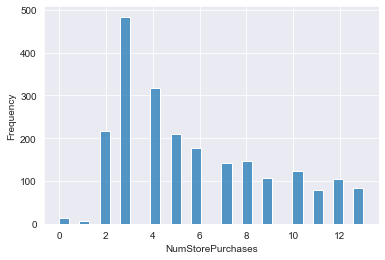

In [22]:
hist = sns.histplot(customer_df['NumStorePurchases'], bins=30)
hist.set(ylabel='Frequency')
plt.show()

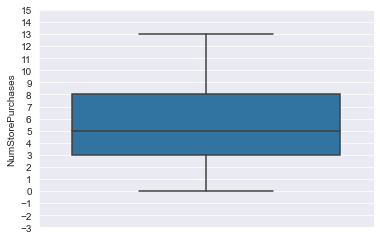

In [23]:
box = sns.boxplot(y=customer_df['NumStorePurchases'])
box.set_yticks(range(-3, 16,1))
plt.show()

In [24]:
target = customer_df['Response']
relevant_data = customer_df.drop(['Year_Birth', 'Z_CostContact', 'Response', 'Z_Revenue', 'Dt_Customer'], axis=1)

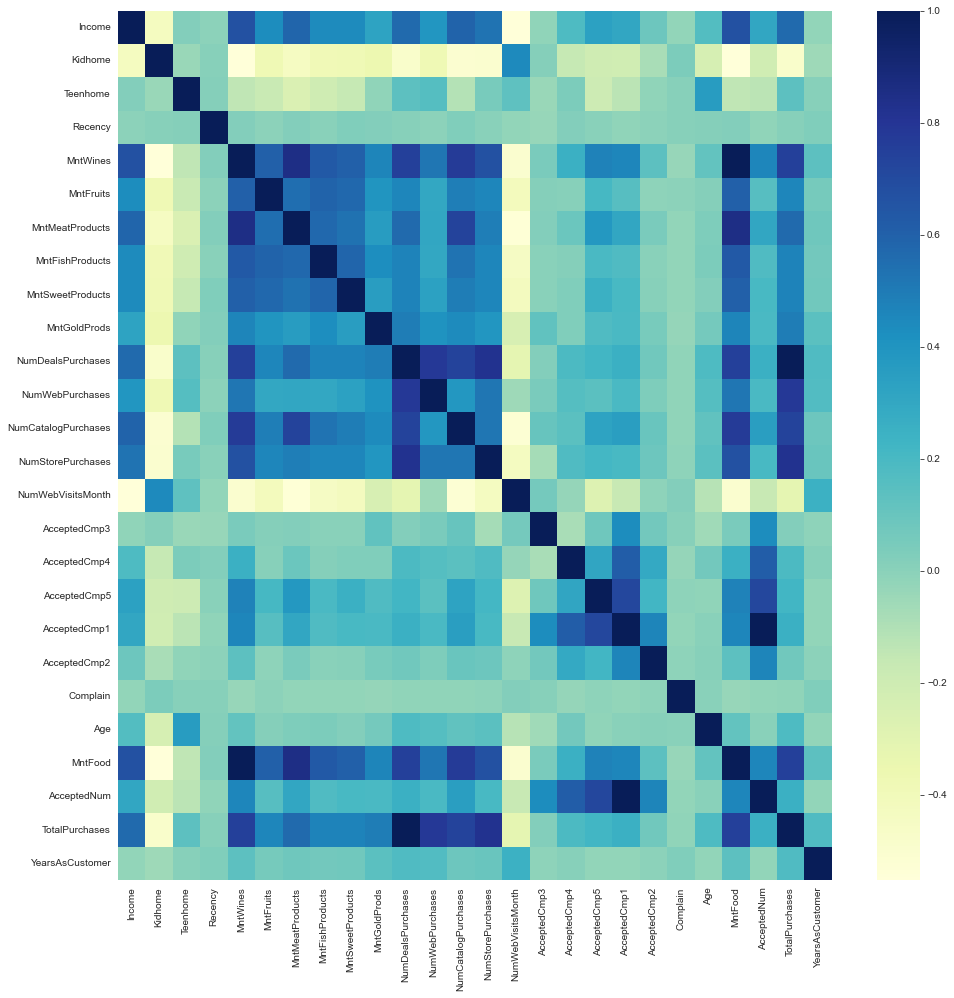

In [25]:
plt.figure(figsize=(16,16))
sns.heatmap(relevant_data.corr(), cmap="YlGnBu")
plt.show()

TotalPurchases positively correlated to different types of purchases <br>
Income negatively correlated to amount of kids/dependants and NumWebVisitsMonth

In [26]:
target = relevant_data['NumStorePurchases']
relevant_data = relevant_data.drop(['TotalPurchases', 'NumStorePurchases'] ,axis=1)

In [27]:
relevant_data.dtypes[relevant_data.dtypes == 'O']

Education         object
Marital_Status    object
dtype: object

In [28]:
def fill_categorical(column: pd.Series) -> pd.Series: 
    """
    Function gets column of categorical data 
    Returns numeric version of given column
    """
    
    col = column
    un = col.unique()
    replace_dict = {un[i]:i for i in range(len(un))}
    
    col = col.replace(replace_dict)
    return col
    

In [29]:
relevant_data['Education'] = fill_categorical(relevant_data['Education'])

In [30]:
relevant_data['Marital_Status'] = fill_categorical(relevant_data['Marital_Status'])

In [31]:
split_point = int(relevant_data.shape[0]*0.7)

In [32]:
train = relevant_data.iloc[:split_point].reset_index().drop('ID', axis=1)
train_target = target[:split_point].reset_index().drop('ID', axis=1)
test = relevant_data.iloc[split_point:].reset_index().drop('ID', axis=1)
test_target = target[split_point:].reset_index().drop('ID', axis=1)

In [33]:
import statsmodels.api as sm
train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,MntFood,AcceptedNum,YearsAsCustomer
0,0,0,58138.0,0,0,58,1529,88,546,172,...,0,0,0,0,0,0,63,1529,0,8
1,0,0,46344.0,1,1,38,21,1,6,2,...,0,0,0,0,0,0,66,21,0,6
2,0,1,71613.0,0,0,26,734,49,127,111,...,0,0,0,0,0,0,55,734,0,7
3,0,1,26646.0,1,0,26,48,4,20,10,...,0,0,0,0,0,0,36,48,0,6
4,1,2,58293.0,1,0,94,407,43,118,46,...,0,0,0,0,0,0,39,407,0,6


In [34]:
train_data = sm.add_constant(train)
est = sm.OLS(train_target, train_data).fit()

In [35]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      NumStorePurchases   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     463.9
Date:                Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:30:06   Log-Likelihood:                -2375.2
No. Observations:                1549   AIC:                             4800.
Df Residuals:                    1524   BIC:                             4934.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1852      0.378      5.776      0.000       1.443       2.927
Education              -0.0250      0.023     -1.090      0.276      -0.070       0.020
Marital_Status         -0.0095      0.028     -0.340      0.734      -0.064       0.045
Income               1.352e-05    2.8e-06      4.827      0.000    8.03e-06     1.9e-05
Kidhome                -0.8956      0.069    -12.895      0.000      -1.032      -0.759
Teenhome               -0.7037      0.066    -10.704      0.000      -0.833      -0.575
Recency                -0.0004      0.001     -0.398      0.691      -0.002       0.002
MntWines                0.0007   7.84e-05      9.024      0.000       0.001       0.001
MntFruits               0.0010      0.001      0.931      0.352      -0.001       0.003
MntMeatProducts        -0.0023      0.000     -7.900      0.000      -0.003      -0.002
MntFishProducts         0.0008      0.001      1.068      0.286      -0.001       0.002
MntSweetProducts        0.0019      0.001      1.976      0.048    1.42e-05       0.004
MntGoldProds           -0.0002      0.001     -0.353      0.724      -0.002       0.001
NumDealsPurchases       0.6296      0.010     60.091      0.000       0.609       0.650
NumWebPurchases        -0.6523      0.022    -29.323      0.000      -0.696      -0.609
NumCatalogPurchases    -0.7961      0.021    -38.608      0.000      -0.837      -0.756
NumWebVisitsMonth      -0.2094      0.020    -10.565      0.000      -0.248      -0.171
AcceptedCmp3           -0.3279      0.186     -1.763      0.078      -0.693       0.037
AcceptedCmp4           -0.4662      0.198     -2.352      0.019      -0.855      -0.077
AcceptedCmp5           -0.5009      0.221     -2.263      0.024      -0.935      -0.067
AcceptedCmp1            0.1425      0.070      2.044      0.041       0.006       0.279
AcceptedCmp2            0.2903      0.325      0.892      0.373      -0.348       0.929
Complain               -0.0087      0.294     -0.030      0.976      -0.586       0.568
Age                     0.0005      0.003      0.170      0.865      -0.005       0.006
MntFood                 0.0007   7.84e-05      9.024      0.000       0.001       0.001
AcceptedNum             0.1425      0.070      2.044      0.041       0.006       0.279
YearsAsCustomer        -0.0402      0.047     -0.854      0.393      -0.132       0.052
==============================================================================
Omnibus:                      351.491   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2168.710
Skew:                          -0.910   Prob(JB):                         0.00
Kurtosis:                       8.504   Cond. No.                     1.08e+16
================================================

In [36]:
test = sm.add_constant(test)
predictions = est.predict(test)

<h1>Top 5 significant variables</h1>

In [37]:
values = est.pvalues.sort_values()[1:]

In [38]:
values[:5]
#sns.barplot(values)

NumCatalogPurchases    5.307180e-228
NumWebPurchases        3.011629e-150
Kidhome                 3.475120e-36
Teenhome                7.843493e-26
NumWebVisitsMonth       3.141656e-25
dtype: float64

In [39]:
predictions

0      10.172506
1      11.178303
2       2.852978
3      10.682742
4       2.348697
         ...    
659     5.420034
660     6.700187
661    10.817351
662     8.860013
663     3.733417
Length: 664, dtype: float64

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(test_target, predictions)

0.8671853845562257

In [42]:
train_data = train_data.drop(['Complain', 'Recency', 'AcceptedCmp2'], axis=1)

In [43]:
test = test.drop(['Complain', 'Recency', 'AcceptedCmp2'], axis=1)

In [44]:
model = sm.OLS(train_target, train_data).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      NumStorePurchases   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     530.8
Date:                Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:30:07   Log-Likelihood:                -2375.7
No. Observations:                1549   AIC:                             4795.
Df Residuals:                    1527   BIC:                             4913.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1747      0.376      5.791      0.000       1.438       2.911
Education              -0.0253      0.023     -1.104      0.270      -0.070       0.020
Marital_Status         -0.0095      0.028     -0.341      0.733      -0.064       0.045
Income               1.351e-05    2.8e-06      4.832      0.000    8.03e-06     1.9e-05
Kidhome                -0.8991      0.069    -12.972      0.000      -1.035      -0.763
Teenhome               -0.7038      0.066    -10.716      0.000      -0.833      -0.575
MntWines                0.0007   7.83e-05      9.057      0.000       0.001       0.001
MntFruits               0.0010      0.001      0.949      0.343      -0.001       0.003
MntMeatProducts        -0.0023      0.000     -8.006      0.000      -0.003      -0.002
MntFishProducts         0.0008      0.001      1.018      0.309      -0.001       0.002
MntSweetProducts        0.0019      0.001      1.966      0.049    4.77e-06       0.004
MntGoldProds           -0.0003      0.001     -0.391      0.696      -0.002       0.001
NumDealsPurchases       0.6301      0.010     60.251      0.000       0.610       0.651
NumWebPurchases        -0.6540      0.022    -29.506      0.000      -0.697      -0.610
NumCatalogPurchases    -0.7960      0.021    -38.644      0.000      -0.836      -0.756
NumWebVisitsMonth      -0.2088      0.020    -10.550      0.000      -0.248      -0.170
AcceptedCmp3           -0.3906      0.172     -2.270      0.023      -0.728      -0.053
AcceptedCmp4           -0.5219      0.189     -2.761      0.006      -0.893      -0.151
AcceptedCmp5           -0.5723      0.207     -2.768      0.006      -0.978      -0.167
AcceptedCmp1            0.1758      0.059      2.961      0.003       0.059       0.292
Age                     0.0004      0.003      0.155      0.877      -0.005       0.006
MntFood                 0.0007   7.83e-05      9.057      0.000       0.001       0.001
AcceptedNum             0.1758      0.059      2.961      0.003       0.059       0.292
YearsAsCustomer        -0.0412      0.047     -0.877      0.381      -0.133       0.051
==============================================================================
Omnibus:                      352.161   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2179.650
Skew:                          -0.911   Prob(JB):                         0.00
Kurtosis:                       8.519   Cond. No.                     3.63e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matr

In [46]:
pred = model.predict(test)

In [47]:
r2_score(test_target, pred)

0.8671247600615919

<h2>Do people who spend above average amount on gold for the last 2 years would have more in store purchases.<br></h2>
<h2>To check this condact T-test</h2>

In [48]:
mn_gold = customer_df['MntGoldProds'].mean()

In [49]:
above_av = customer_df[customer_df['MntGoldProds'] > mn_gold]['MntGoldProds']

In [50]:
below_av = customer_df[customer_df['MntGoldProds'] <= mn_gold]['MntGoldProds']

(-50.0, 300.0)

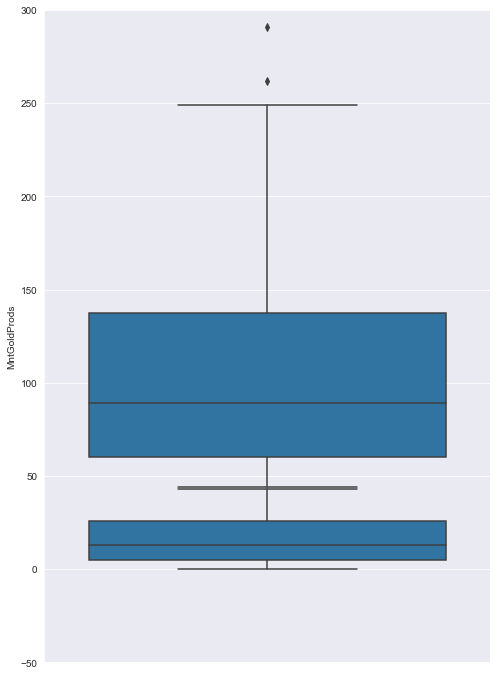

In [51]:
plt.figure(figsize=(8,12))
sns.boxplot(y=above_av)
sns.boxplot(y=below_av)
plt.ylim(-50,300)

In [52]:
gold_test = sp.stats.ttest_ind(above_av, below_av)

In [53]:
gold_test.pvalue

0.0

Pvalue is less than 0.05 so our groups differs and assumption is correct

<h3>Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do “Married PhD candidates” have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)</h3>

In [54]:
fish_spent = customer_df[['Education', 'Marital_Status', 'MntFishProducts']]

In [55]:
fish_spent.head()

,Education,Marital_Status,MntFishProducts
ID,,,
5524,Graduation,Single,172
2174,Graduation,Single,2
4141,Graduation,Together,111
6182,Graduation,Together,10
5324,PhD,Married,46


In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [57]:
inter_test = ols('MntFishProducts ~ C(Education) + C(Marital_Status) + C(Education)*C(Marital_Status)', data=fish_spent).fit()

In [58]:
sm.stats.anova_lm(inter_test, typ=3)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1863: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 24
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,1.129223e+05,1.0,38.848674,5.480754e-10
C(Education),7.835440e+04,4.0,6.739067,2.178377e-05
C(Marital_Status),9.158650e+04,7.0,4.501216,5.429137e-05
C(Education):C(Marital_Status),2.302037e+05,28.0,2.828464,5.788514e-06
Residual,6.342469e+06,2182.0,NaN,NaN


as Pvalue for interaction of variables = 0.032 < 0.05 we may say that interaction between education and marital status is significant

In [59]:
education_money_spent = customer_df.groupby('Education').MntFishProducts.mean()

In [62]:
education_money_spent = education_money_spent.reset_index()
education_money_spent

,Education,MntFishProducts
0,2n Cycle,48.454545
1,Basic,17.055556
2,Graduation,43.416667
3,Master,31.493151
4,PhD,26.716667


Text(0, 0.5, 'Money spent on fish (thsnd $)')

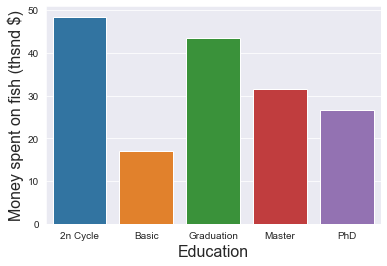

In [63]:
sns.barplot(x='Education', y='MntFishProducts', data=education_money_spent)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Money spent on fish (thsnd $)', fontsize=16)

In [64]:
marital_status_fish = customer_df.groupby('Marital_Status').MntFishProducts.mean().reset_index()

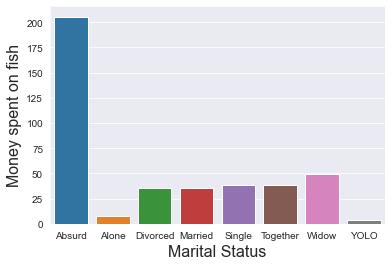

In [66]:
sns.barplot(x='Marital_Status', y='MntFishProducts', data=marital_status_fish)
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Money spent on fish', fontsize=16)
plt.show()

In [70]:
mstat_educ_df = customer_df[['Education','Marital_Status','MntFishProducts']]

In [74]:
mstat_educ_df['MarStatus_Education'] = str(mstat_educ_df['Education']) + '&' + str(mstat_educ_df['Marital_Status'])

<ipython-input-74-16412b0889b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mstat_educ_df['MarStatus_Education'] = str(mstat_educ_df['Education']) + '&' + str(mstat_educ_df['Marital_Status'])


In [87]:
mstat_educ_df['MarStatus_Education'] = mstat_educ_df['Education'] + '&' + mstat_educ_df['Marital_Status']

In [91]:
mstatus_educ_group = mstat_educ_df.groupby('MarStatus_Education')['MntFishProducts'].sum().reset_index()

In [115]:
mstatus_educ_group['Education'] = mstatus_educ_group['MarStatus_Education'].str.split(pat='&', expand=True)

Text(0, 0.5, 'Money spent on fish (thsnd $)')

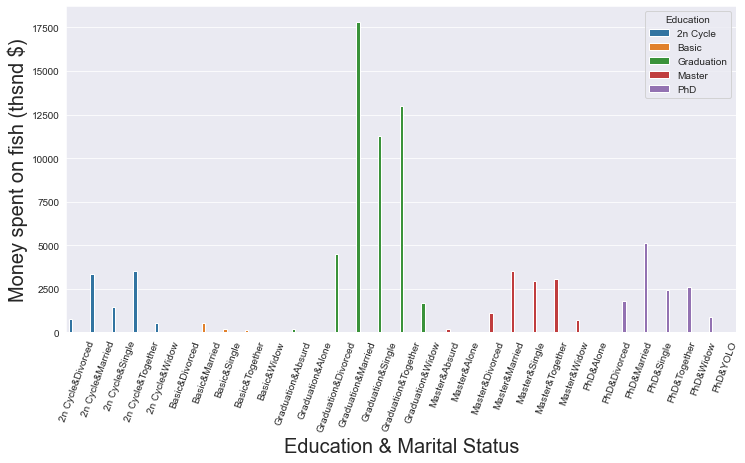

In [136]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='MarStatus_Education', y='MntFishProducts', data=mstatus_educ_group, hue='Education')
plt.xticks(rotation=70)
plt.xlabel('Education & Marital Status', fontsize=20)
plt.ylabel('Money spent on fish (thsnd $)', fontsize=20)

<h3>As we may see from chart, Graduated people tend to buy more fish products</h3>